## Manysearch interpretation

All files on farm in `/home/ctbrown/scratch3/2026-manysearch-many-metagenomes`

In [1]:
# base checkout of workflow directory is here:
BASE='/home/ctbrown/scratch3/2026-manysearch-many-metagenomes'

# parquet files from 'sourmash gather' against 3,216 metagenomes
#BASE_OUTPUTS=BASE+'/manysearch/mattia-2k'
BASE_OUTPUTS='/home/ctbrown/scratch3/2025-sourmash-gather-to-vec/colton-manysearch.jan22'

MIN_NUM_SAMPLES_PER_CONDITION=800
HASH_THRESHOLD=3

In [2]:
import polars as pl
import glob
import matplotlib.pyplot as plt

In [3]:
extract_species_from_name = (pl.col("match_name")
                             .str.split(' ')
                             .list.slice(1, 2)
                             .list.join(' '))

In [4]:
filenames = glob.glob(BASE_OUTPUTS + '/*.parquet')

all_df = (pl.scan_parquet(filenames)
          .filter(pl.col("intersect_hashes") >= HASH_THRESHOLD)
          .with_columns(species=extract_species_from_name)
          .with_columns((pl.col("intersect_hashes") * pl.col("scaled")).alias("intersect_bp"))).collect()
#          .select(["species", "containment", "query_name", "intersect_bp", "scaled"])).collect()


In [19]:
print(f"loaded {all_df['query_name'].n_unique()} manysearch.")

loaded 31160 manysearch.


In [20]:
all_df

query_name,query_md5,match_name,containment,intersect_hashes,ksize,scaled,moltype,match_md5,jaccard,max_containment,query_containment_ani,species,intersect_bp
str,str,str,f64,i64,i64,i64,str,str,str,str,f64,str,i64
"""ERR3405776""","""7d870eb0f0a35812d3f76c1ea39d07…","""GCF_959023655 s__Streptococcus…",0.015361,406,21,1000,"""DNA""",null,null,null,0.819671,"""s__Streptococcus lactarius""",406000
"""ERR3405776""","""7d870eb0f0a35812d3f76c1ea39d07…","""GCF_007667235 s__Staphylococcu…",0.009232,244,21,1000,"""DNA""",null,null,null,0.800035,"""s__Staphylococcus epidermidis""",244000
"""ERR3405776""","""7d870eb0f0a35812d3f76c1ea39d07…","""GCF_015102215 s__Bifidobacteri…",0.007151,189,21,1000,"""DNA""",null,null,null,0.790364,"""s__Bifidobacterium infantis""",189000
"""ERR3405776""","""7d870eb0f0a35812d3f76c1ea39d07…","""GCF_964238715 s__Bifidobacteri…",0.005335,141,21,1000,"""DNA""",null,null,null,0.779413,"""s__Bifidobacterium longum""",141000
"""ERR3405776""","""7d870eb0f0a35812d3f76c1ea39d07…","""GCF_037572815 s__Lactiplantiba…",0.002611,69,21,1000,"""DNA""",null,null,null,0.753335,"""s__Lactiplantibacillus plantar…",69000
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""ERR4563596""","""d0cc5649c2af57313e5bdb39c77fed…","""GCF_009858455 s__Vibrio choler…",0.000017,3,21,1000,"""DNA""",null,null,null,0.592334,"""s__Vibrio cholerae""",3000
"""ERR4563596""","""d0cc5649c2af57313e5bdb39c77fed…","""GCF_014385275 s__Massiliimalia…",0.00005,9,21,1000,"""DNA""",null,null,null,0.624147,"""s__Massiliimalia timonensis""",9000
"""ERR4563596""","""d0cc5649c2af57313e5bdb39c77fed…","""GCA_902490385 s__Metaruminococ…",0.00005,9,21,1000,"""DNA""",null,null,null,0.624147,"""s__Metaruminococcus_A sp900762…",9000


In [21]:
condition_df = pl.read_csv('../../2025-sourmash-gather-to-vec/stool_idents_sat25_total100K.csv')

In [22]:
condition_counts_df = condition_df['condition'].value_counts(name='condition_count').sort(by='condition_count', descending=True).filter(pl.col("condition_count") >= MIN_NUM_SAMPLES_PER_CONDITION)
condition_counts_df = condition_counts_df.with_row_index(name='condition_index')
condition_counts_df

condition_index,condition,condition_count
u32,str,u32
0,"""healthy""",18935
1,"""T2D""",2808
2,"""MS""",1909
3,"""IGT;MS""",1392
4,"""CAD;T2D""",832


In [23]:
len(all_df)

33319712

In [24]:
def filter_combined_df_by_threshold(sub_df, metadata_df, frac, *, condition=None):
    if condition is not None:
        metadata_df = metadata_df.filter(pl.col("condition") == condition)

        sub_df = sub_df.join(metadata_df, left_on='query_name', right_on='acc', how='inner')

    total = sub_df["query_name"].n_unique()
    cutoff = int(frac * total + 1)

    group_df = sub_df.group_by('species') \
            .agg(pl.len()) \
            .filter(pl.col("len") >= cutoff)

    group_df = group_df.sort("len", descending=True).with_columns(
        (pl.col("len") / total).alias("frequency")
    ).with_row_index(name="rank")
    return (cutoff, total, group_df)

## Across all samples (no condition restriction) - ~31k samples

In [25]:
cutoff, total, group_df = filter_combined_df_by_threshold(all_df, condition_df, 0.8)

with pl.Config(tbl_rows=-1):
    print(group_df)

shape: (46, 4)
┌──────┬─────────────────────────────────┬───────┬───────────┐
│ rank ┆ species                         ┆ len   ┆ frequency │
│ ---  ┆ ---                             ┆ ---   ┆ ---       │
│ u32  ┆ str                             ┆ u32   ┆ f64       │
╞══════╪═════════════════════════════════╪═══════╪═══════════╡
│ 0    ┆ s__Escherichia coli             ┆ 30785 ┆ 0.987965  │
│ 1    ┆ s__Phocaeicola vulgatus         ┆ 29697 ┆ 0.953049  │
│ 2    ┆ s__Bacteroides uniformis        ┆ 29480 ┆ 0.946085  │
│ 3    ┆ s__Parabacteroides distasonis   ┆ 29394 ┆ 0.943325  │
│ 4    ┆ s__Bacteroides thetaiotaomicro… ┆ 28927 ┆ 0.928338  │
│ 5    ┆ s__Blautia_A wexlerae           ┆ 28921 ┆ 0.928145  │
│ 6    ┆ s__Bacteroides ovatus           ┆ 28450 ┆ 0.91303   │
│ 7    ┆ s__Phocaeicola dorei            ┆ 28334 ┆ 0.909307  │
│ 8    ┆ s__Agathobacter rectalis        ┆ 28262 ┆ 0.906996  │
│ 9    ┆ s__Blautia_A faecis             ┆ 27948 ┆ 0.896919  │
│ 10   ┆ s__Faecalibacterium longum     

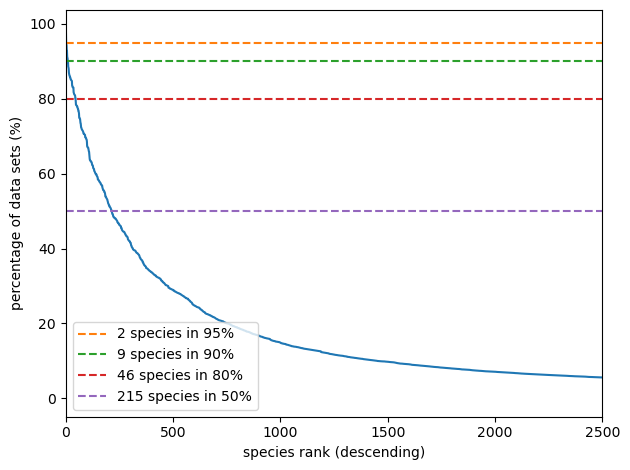

In [26]:
frac = 0
cutoff, total, group_df = filter_combined_df_by_threshold(all_df, condition_df, frac)

len95 = len(group_df.filter(pl.col("frequency") >= 0.95))
len90 = len(group_df.filter(pl.col("frequency") >= 0.90))
len80 = len(group_df.filter(pl.col("frequency") >= 0.80))
len50 = len(group_df.filter(pl.col("frequency") >= 0.50))


plt.plot(group_df["rank"], group_df["frequency"]*100)
plt.plot([0, len(group_df)], [95, 95], '--', label=f'{len95} species in 95%')
plt.plot([0, len(group_df)], [90, 90], '--', label=f'{len90} species in 90%')
plt.plot([0, len(group_df)], [80, 80], '--', label=f'{len80} species in 80%')
plt.plot([0, len(group_df)], [50, 50], '--', label=f'{len50} species in 50%')

#plt.title("num core species at various thresholds in >= 1GB datasets")
plt.xlabel("species rank (descending)")
plt.ylabel("percentage of data sets (%)")
plt.legend(loc='lower left')
plt.xlim(0, 2500)
plt.tight_layout()

## Healthy only (~18.8k samples)

In [27]:
cutoff, total, group_df = filter_combined_df_by_threshold(all_df, condition_df, 0.8, condition='healthy')

with pl.Config(tbl_rows=-1):
    print(group_df)

shape: (42, 4)
┌──────┬─────────────────────────────────┬───────┬───────────┐
│ rank ┆ species                         ┆ len   ┆ frequency │
│ ---  ┆ ---                             ┆ ---   ┆ ---       │
│ u32  ┆ str                             ┆ u32   ┆ f64       │
╞══════╪═════════════════════════════════╪═══════╪═══════════╡
│ 0    ┆ s__Escherichia coli             ┆ 18797 ┆ 0.992712  │
│ 1    ┆ s__Phocaeicola vulgatus         ┆ 17861 ┆ 0.94328   │
│ 2    ┆ s__Bacteroides uniformis        ┆ 17690 ┆ 0.934249  │
│ 3    ┆ s__Parabacteroides distasonis   ┆ 17683 ┆ 0.933879  │
│ 4    ┆ s__Blautia_A wexlerae           ┆ 17245 ┆ 0.910747  │
│ 5    ┆ s__Bacteroides thetaiotaomicro… ┆ 17169 ┆ 0.906734  │
│ 6    ┆ s__Bacteroides ovatus           ┆ 16899 ┆ 0.892474  │
│ 7    ┆ s__Faecalibacterium longum      ┆ 16834 ┆ 0.889041  │
│ 8    ┆ s__Agathobacter rectalis        ┆ 16825 ┆ 0.888566  │
│ 9    ┆ s__Phocaeicola dorei            ┆ 16668 ┆ 0.880275  │
│ 10   ┆ s__Blautia_A faecis            

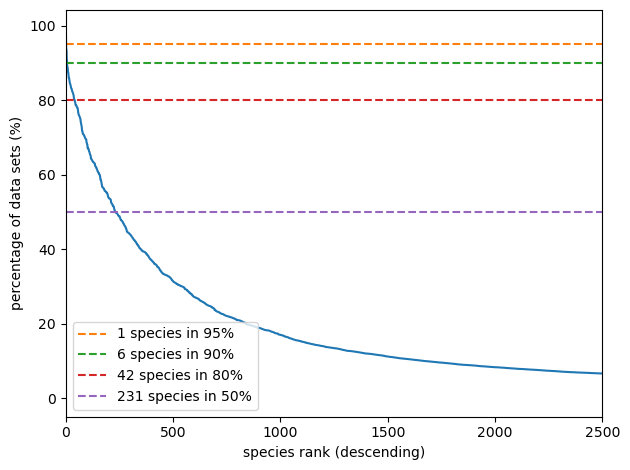

In [28]:
frac = 0
cutoff, total, group_df = filter_combined_df_by_threshold(all_df, condition_df, frac, condition='healthy')

len95 = len(group_df.filter(pl.col("frequency") >= 0.95))
len90 = len(group_df.filter(pl.col("frequency") >= 0.90))
len80 = len(group_df.filter(pl.col("frequency") >= 0.80))
len50 = len(group_df.filter(pl.col("frequency") >= 0.50))


plt.plot(group_df["rank"], group_df["frequency"]*100)
plt.plot([0, len(group_df)], [95, 95], '--', label=f'{len95} species in 95%')
plt.plot([0, len(group_df)], [90, 90], '--', label=f'{len90} species in 90%')
plt.plot([0, len(group_df)], [80, 80], '--', label=f'{len80} species in 80%')
plt.plot([0, len(group_df)], [50, 50], '--', label=f'{len50} species in 50%')

#plt.title("num core species at various thresholds in >= 1GB datasets")
plt.xlabel("species rank (descending)")
plt.ylabel("percentage of data sets (%)")
plt.legend(loc='lower left')
plt.xlim(0, 2500)
plt.tight_layout()

## For each condition:

In [29]:
any90 = set()
any80 = set()


for condition in condition_counts_df['condition']:
    cutoff, total, group_df = filter_combined_df_by_threshold(all_df, condition_df, frac, condition=condition)
    print(f"for condition {condition}, {total} samples.")

    sub_df = group_df.filter((pl.col("frequency") >= 0.8))
    any80.update(sub_df['species'].to_list())

    sub_df = group_df.filter((pl.col("frequency") >= 0.9))
    any90.update(sub_df['species'].to_list())
    
    #matches = sub_df.sample(11, seed=42)
    #sub_df
    
    with pl.Config(tbl_rows=-1):
        print(sub_df.select(["rank", "frequency", "species"]))

for condition healthy, 18935 samples.
shape: (6, 3)
┌──────┬───────────┬─────────────────────────────────┐
│ rank ┆ frequency ┆ species                         │
│ ---  ┆ ---       ┆ ---                             │
│ u32  ┆ f64       ┆ str                             │
╞══════╪═══════════╪═════════════════════════════════╡
│ 0    ┆ 0.992712  ┆ s__Escherichia coli             │
│ 1    ┆ 0.94328   ┆ s__Phocaeicola vulgatus         │
│ 2    ┆ 0.934249  ┆ s__Bacteroides uniformis        │
│ 3    ┆ 0.933879  ┆ s__Parabacteroides distasonis   │
│ 4    ┆ 0.910747  ┆ s__Blautia_A wexlerae           │
│ 5    ┆ 0.906734  ┆ s__Bacteroides thetaiotaomicro… │
└──────┴───────────┴─────────────────────────────────┘
for condition T2D, 2808 samples.
shape: (22, 3)
┌──────┬───────────┬─────────────────────────────────┐
│ rank ┆ frequency ┆ species                         │
│ ---  ┆ ---       ┆ ---                             │
│ u32  ┆ f64       ┆ str                             │
╞══════╪═══════════╪

## Look at all species that are above 80% or 90% in any condition

In [30]:
print(len(any80), len(any90))

103 53


In [31]:
frac = 0.

any90_sub_df = all_df.filter(pl.col("species").is_in(any90))

condition_d = {}
for condition in condition_counts_df['condition']:
    print('doing:', condition)
    cutoff, total, group_df = filter_combined_df_by_threshold(any90_sub_df, condition_df, frac, condition=condition)
    condition_d[condition] = group_df

join_df = None
for condition, group_df in condition_d.items():
    group_df = (group_df.with_columns((pl.col("frequency") * 100).round(1).alias(condition))
                .select(['species', condition]))
    if join_df is None:
        join_df = group_df
    else:
        join_df = join_df.join(group_df, on='species', how='full', coalesce=True)

with pl.Config(tbl_rows=-1):
    print(join_df)

doing: healthy
doing: T2D
doing: MS
doing: IGT;MS
doing: CAD;T2D
shape: (53, 6)
┌─────────────────────────────────┬─────────┬──────┬───────┬────────┬─────────┐
│ species                         ┆ healthy ┆ T2D  ┆ MS    ┆ IGT;MS ┆ CAD;T2D │
│ ---                             ┆ ---     ┆ ---  ┆ ---   ┆ ---    ┆ ---     │
│ str                             ┆ f64     ┆ f64  ┆ f64   ┆ f64    ┆ f64     │
╞═════════════════════════════════╪═════════╪══════╪═══════╪════════╪═════════╡
│ s__Bacteroides uniformis        ┆ 93.5    ┆ 99.7 ┆ 98.6  ┆ 99.5   ┆ 100.0   │
│ s__Phocaeicola vulgatus         ┆ 94.4    ┆ 99.8 ┆ 100.0 ┆ 100.0  ┆ 100.0   │
│ s__Bacteroides thetaiotaomicro… ┆ 90.8    ┆ 99.5 ┆ 99.4  ┆ 99.0   ┆ 99.8    │
│ s__Blautia_A wexlerae           ┆ 91.2    ┆ 98.3 ┆ 99.4  ┆ 99.2   ┆ 99.6    │
│ s__Fusicatenibacter saccharivo… ┆ 86.4    ┆ 93.4 ┆ 96.3  ┆ 98.0   ┆ 99.4    │
│ s__Blautia_A faecis             ┆ 87.6    ┆ 95.9 ┆ 98.0  ┆ 99.2   ┆ 99.3    │
│ s__Phocaeicola dorei            ┆ 88.1

In [32]:
frac = 0.

any80_sub_df = all_df.filter(pl.col("species").is_in(any80))

condition_d = {}
for condition in condition_counts_df['condition']:
    print('doing:', condition)
    cutoff, total, group_df = filter_combined_df_by_threshold(any80_sub_df, condition_df, frac, condition=condition)
    condition_d[condition] = group_df

join_df = None
for condition, group_df in condition_d.items():
    group_df = (group_df.with_columns((pl.col("frequency") * 100).round(1).alias(condition))
                .select(['species', condition]))
    if join_df is None:
        join_df = group_df
    else:
        join_df = join_df.join(group_df, on='species', how='full', coalesce=True)

with pl.Config(tbl_rows=-1):
    print(join_df)

doing: healthy
doing: T2D
doing: MS
doing: IGT;MS
doing: CAD;T2D
shape: (103, 6)
┌─────────────────────────────────┬─────────┬──────┬───────┬────────┬─────────┐
│ species                         ┆ healthy ┆ T2D  ┆ MS    ┆ IGT;MS ┆ CAD;T2D │
│ ---                             ┆ ---     ┆ ---  ┆ ---   ┆ ---    ┆ ---     │
│ str                             ┆ f64     ┆ f64  ┆ f64   ┆ f64    ┆ f64     │
╞═════════════════════════════════╪═════════╪══════╪═══════╪════════╪═════════╡
│ s__Bacteroides uniformis        ┆ 93.4    ┆ 99.7 ┆ 98.6  ┆ 99.5   ┆ 100.0   │
│ s__Phocaeicola vulgatus         ┆ 94.4    ┆ 99.8 ┆ 100.0 ┆ 100.0  ┆ 100.0   │
│ s__Bacteroides thetaiotaomicro… ┆ 90.7    ┆ 99.5 ┆ 99.4  ┆ 99.0   ┆ 99.8    │
│ s__Blautia_A wexlerae           ┆ 91.1    ┆ 98.3 ┆ 99.4  ┆ 99.2   ┆ 99.6    │
│ s__Fusicatenibacter saccharivo… ┆ 86.3    ┆ 93.4 ┆ 96.3  ┆ 98.0   ┆ 99.4    │
│ s__Blautia_A faecis             ┆ 87.6    ┆ 95.9 ┆ 98.0  ┆ 99.2   ┆ 99.3    │
│ s__Phocaeicola dorei            ┆ 88.